## Analaysis of the dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

1 - male  
0 - female  
males = 207  
females = 96  

In [7]:
male_num = 207
female_num = 96

total = male_num + female_num
male_percent =  (male_num / total) * 100
female_percent = (female_num / total) * 100

In [8]:
male_percent

68.31683168316832

In [9]:
female_percent

31.683168316831683

Males are of6 68 percent of the entire dataset. Females are just 31 percent.

In [10]:
disease_df = df[df['target']==1]

In [11]:
disease_df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
positive_counts = len(disease_df)
positive_counts

165

In [13]:
disease_percentage = positive_counts / len(df) * 100
disease_percentage

54.45544554455446

In [14]:
disease_df['sex'].value_counts()

sex
1    93
0    72
Name: count, dtype: int64

In [15]:
positive_males = 93
positive_females = 72

positive_male_percentage  = positive_males / positive_counts * 100
positive_female_percentage = positive_females / positive_counts * 100

In [16]:
positive_male_percentage

56.36363636363636

In [17]:
positive_female_percentage

43.63636363636363

56.36% of the people with heart disease are males and 43.63 are females

In [18]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df['chest_pain_type'].value_counts()

chest_pain_type
0    143
2     87
1     50
3     23
Name: count, dtype: int64

- chest_pain_type - type of the chest pain  
    - Value 0: typical angina  
    - Value 1: atypical angina  
    - Value 2: non-anginal pain  
    - Value 3: asymptomatic  

In [20]:
df['fasting_blood_sugar'].value_counts()

fasting_blood_sugar
0    258
1     45
Name: count, dtype: int64

fasting_blood_sugar - Blood sugar while fasting & [ > 120 mg/dl ] (1 = true; 0 = false)

In [21]:
df['restecg'].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

- restecg - ECG (electrocardiographic) while resting  
    - Value 0: normal  
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  

In [22]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

- exang - exercise-induced angina (1 = yes; 0 = no)  
    - Exercise-induced angina (AP) is a common complaint of cardiac patients, particularly when exercising in the cold. It usually happens during activity (exertion) and goes away with rest or angina medication. For example, pain, when walking uphill or in cold weather, maybe angina. Stable angina pain is predictable and usually similar to previous episodes of chest pain.

In [23]:
df['slope'].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

- slope - the slope of the peak exercise ST segment  
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping

In [24]:
df['num_major_vessels'].value_counts()

num_major_vessels
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

num_major_vessels - no. of major vessels (0-3) colored by fluoroscopy

In [38]:
df['thal'].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

- thal - thalassemia  
    - 0: normal   
    - 1: fixed defect  
    - 2: reversible defect  
    - People with thalassemia can get too much iron in their bodies, either from the disease or from frequent blood transfusions. Too much iron can result in damage to your heart, liver & endocrine system, which includes hormone-producing glands that regulate processes throughout your body.

## Some more stats and visuals

In [26]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.corr()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_hr,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

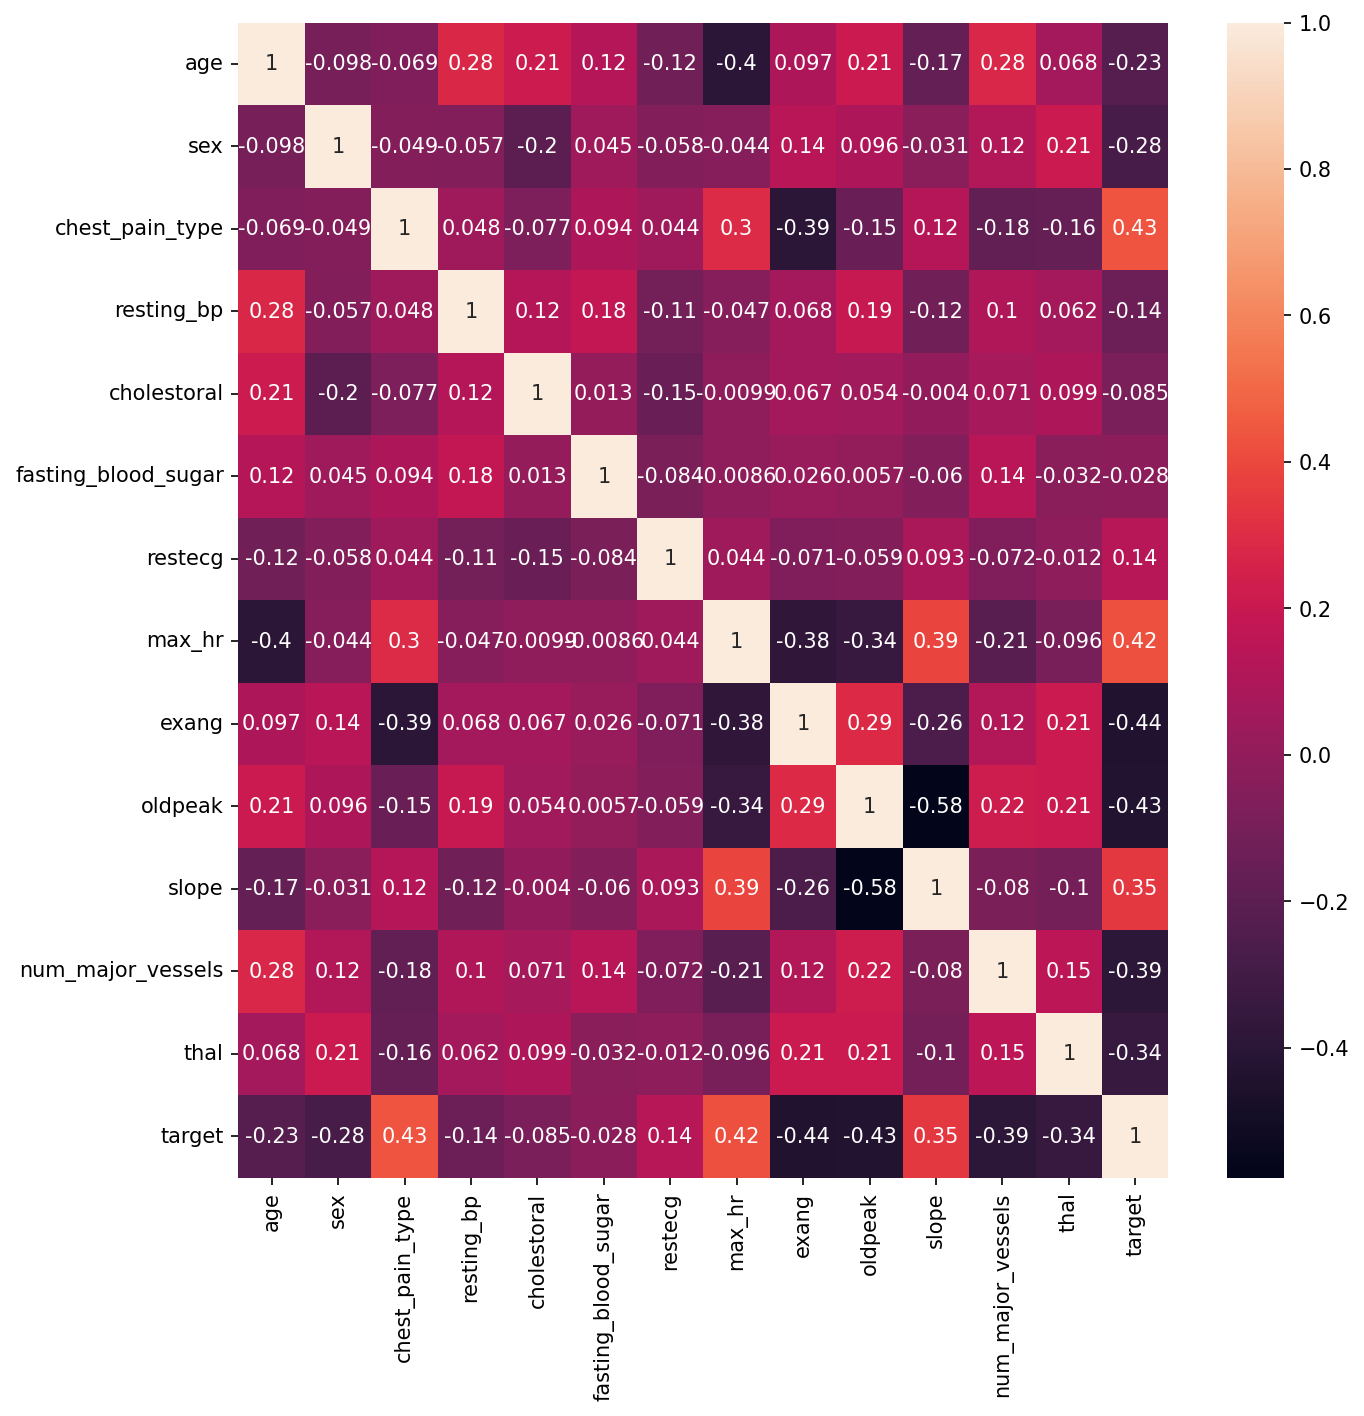

In [29]:
fig = plt.figure(figsize=(10,10),dpi=150)
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='target', ylabel='count'>

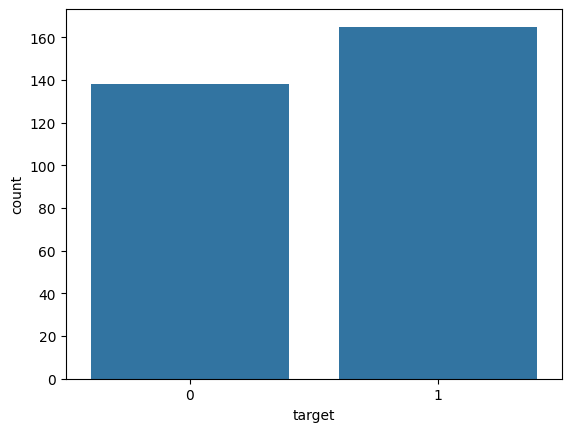

In [30]:
# Countplot for the target column
sns.countplot(x='target', data=df)

In [31]:
df.corr()['target']

age                   -0.225439
sex                   -0.280937
chest_pain_type        0.433798
resting_bp            -0.144931
cholestoral           -0.085239
fasting_blood_sugar   -0.028046
restecg                0.137230
max_hr                 0.421741
exang                 -0.436757
oldpeak               -0.430696
slope                  0.345877
num_major_vessels     -0.391724
thal                  -0.344029
target                 1.000000
Name: target, dtype: float64

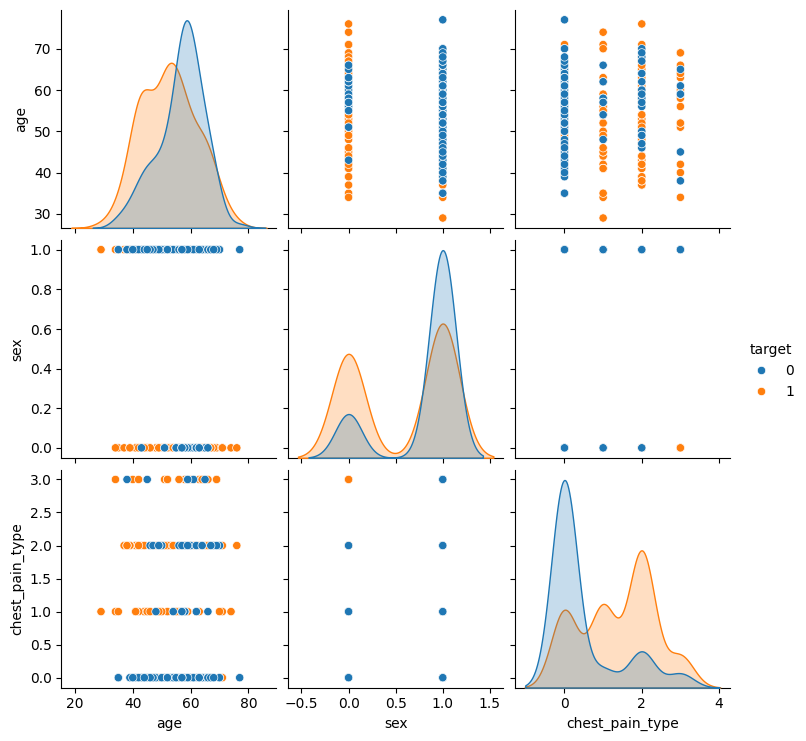

In [39]:
# Selecting a few columns for the pairplot
pplot_cols = ['age', 'sex', 'chest_pain_type', 'target']
df_pplot = df[pplot_cols]
sns.pairplot(data=df_pplot, hue='target')

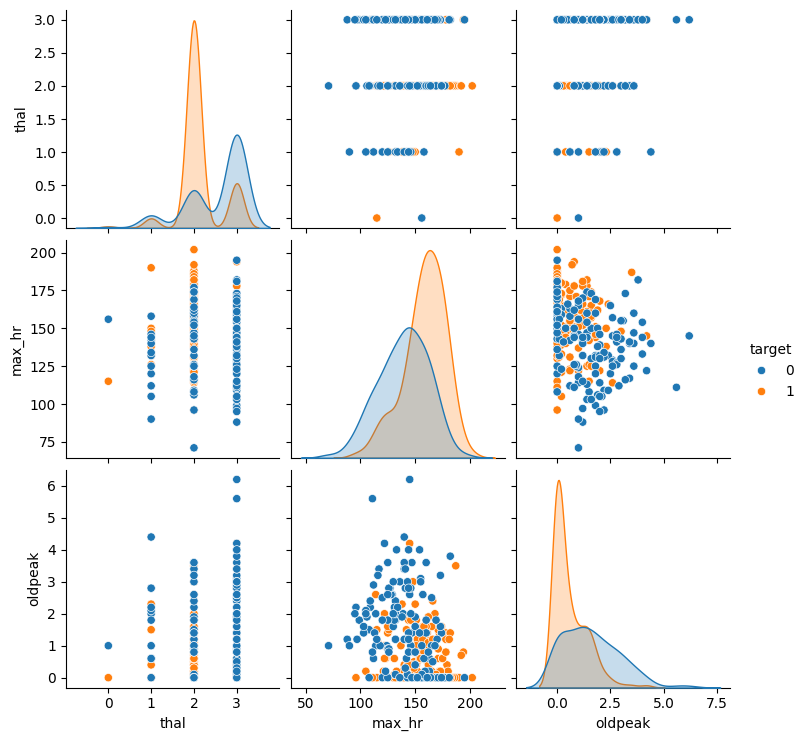

In [40]:
pplot_cols2 = ['thal', 'max_hr', 'oldpeak', 'target']
df_pplot2 = df[pplot_cols2]
sns.pairplot(data=df_pplot2, hue='target')